In [5]:
import requests 
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')))
from credential import FMP_API_KEY
from highlight_text import ax_text,fig_text
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import morethemes as mt 
from matplotlib.ticker import PercentFormatter


In [6]:
url = 'https://financialmodelingprep.com/stable/financial-statement-symbol-list?apikey=BRPK2sTMVreynjvQkRsguJCQajJHh2pA'
r = requests.get(url, timeout=30)

print(r)

<Response [402]>


In [7]:
url = "https://financialmodelingprep.com/api/v3/income-statement/NFLX"
params = {
    "period": "annual",
    "limit": 10,
    "apikey": FMP_API_KEY
}

r = requests.get(url, params=params, timeout=30)
data = r.json()
print(data)



[{'date': '2024-12-31', 'symbol': 'NFLX', 'reportedCurrency': 'USD', 'cik': '0001065280', 'fillingDate': '2025-01-27', 'acceptedDate': '2025-01-27 16:01:56', 'calendarYear': '2024', 'period': 'FY', 'revenue': 39000966000, 'costOfRevenue': 21038464000, 'grossProfit': 17962502000, 'grossProfitRatio': 0.4605655665, 'researchAndDevelopmentExpenses': 2925295000, 'generalAndAdministrativeExpenses': 1702039000, 'sellingAndMarketingExpenses': 2917554000, 'sellingGeneralAndAdministrativeExpenses': 4619593000, 'otherExpenses': 0, 'operatingExpenses': 7544888000, 'costAndExpenses': 28583352000, 'interestIncome': 266776000, 'interestExpense': 718733000, 'depreciationAndAmortization': 15630431000, 'ebitda': 26314821000, 'ebitdaratio': 0.6747222876, 'operatingIncome': 10417614000, 'operatingIncomeRatio': 0.2671116915, 'totalOtherIncomeExpensesNet': -451957000, 'incomeBeforeTax': 9965657000, 'incomeBeforeTaxRatio': 0.2555233376, 'incomeTaxExpense': 1254026000, 'netIncome': 8711631000, 'netIncomeRatio

In [8]:
df = pd.DataFrame(data)

In [9]:
df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2024-12-31,NFLX,USD,0001065280,2025-01-27,2025-01-27 16:01:56,2024,FY,39000966000,21038464000,...,0.255523,1254026000,8711631000,0.223370,20.28,19.83,429519000,439261000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
1,2023-12-31,NFLX,USD,0001065280,2024-01-26,2024-01-26 16:01:56,2023,FY,33723297000,19715368000,...,0.184009,797415000,5407990000,0.160364,12.25,12.03,441571000,449498000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
2,2022-12-31,NFLX,USD,0001065280,2023-01-26,2023-01-26 16:03:50,2022,FY,31615550000,19168285000,...,0.166498,772005000,4491924000,0.142080,10.10,9.95,444698000,451290000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
3,2021-12-31,NFLX,USD,0001065280,2022-01-27,2022-01-27 17:03:33,2021,FY,29697844000,17332683000,...,0.196651,723875000,5116228000,0.172276,11.55,11.24,443155000,455372000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...
4,2020-12-31,NFLX,USD,0001065280,2021-01-28,2021-01-28 16:21:59,2020,FY,24996056000,15276319000,...,0.127994,437954000,2761395000,0.110473,6.26,6.08,440922000,454208000,https://www.sec.gov/Archives/edgar/data/106528...,https://www.sec.gov/Archives/edgar/data/106528...


In [10]:
df.to_csv('Netflix_NFLX_income_annual.csv', index = False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   symbol                                   5 non-null      object 
 2   reportedCurrency                         5 non-null      object 
 3   cik                                      5 non-null      object 
 4   fillingDate                              5 non-null      object 
 5   acceptedDate                             5 non-null      object 
 6   calendarYear                             5 non-null      object 
 7   period                                   5 non-null      object 
 8   revenue                                  5 non-null      int64  
 9   costOfRevenue                            5 non-null      int64  
 10  grossProfit                              5 non-null   

In [12]:
cols_with_ratio = df.columns[df.columns.str.contains('ratio',case = False)]
print(cols_with_ratio)

Index(['grossProfitRatio', 'ebitdaratio', 'operatingIncomeRatio',
       'incomeBeforeTaxRatio', 'netIncomeRatio'],
      dtype='object')


In [13]:
ratio_values = df[cols_with_ratio]
print(ratio_values)

   grossProfitRatio  ebitdaratio  operatingIncomeRatio  incomeBeforeTaxRatio  \
0          0.460566     0.674722              0.267112              0.255523   
1          0.415378     0.637790              0.206208              0.184009   
2          0.393707     0.643131              0.178166              0.166498   
3          0.416366     0.641276              0.208584              0.196651   
4          0.388851     0.620414              0.183440              0.127994   

   netIncomeRatio  
0        0.223370  
1        0.160364  
2        0.142080  
3        0.172276  
4        0.110473  


In [14]:
ratio_values_year = list(cols_with_ratio) + ['calendarYear']
print(ratio_values_year)

['grossProfitRatio', 'ebitdaratio', 'operatingIncomeRatio', 'incomeBeforeTaxRatio', 'netIncomeRatio', 'calendarYear']


In [15]:
df_ratio_values_year = df[ratio_values_year]
print(df_ratio_values_year)

   grossProfitRatio  ebitdaratio  operatingIncomeRatio  incomeBeforeTaxRatio  \
0          0.460566     0.674722              0.267112              0.255523   
1          0.415378     0.637790              0.206208              0.184009   
2          0.393707     0.643131              0.178166              0.166498   
3          0.416366     0.641276              0.208584              0.196651   
4          0.388851     0.620414              0.183440              0.127994   

   netIncomeRatio calendarYear  
0        0.223370         2024  
1        0.160364         2023  
2        0.142080         2022  
3        0.172276         2021  
4        0.110473         2020  


In [16]:
type(df_ratio_values_year)

pandas.core.frame.DataFrame

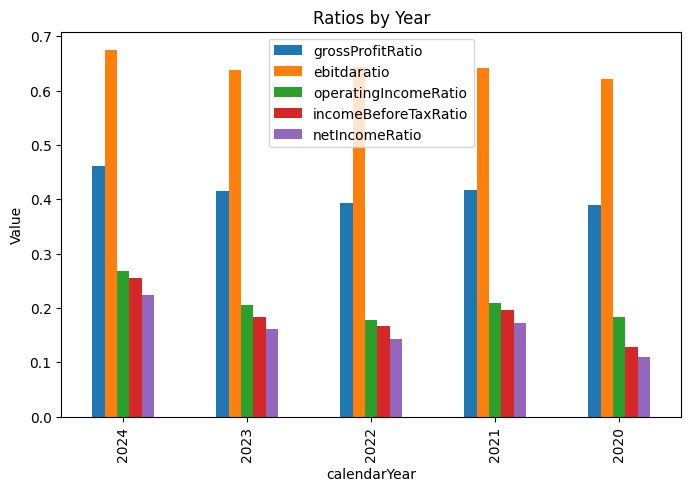

In [17]:
# set "year" as x-axis
df_ratio_values_year.plot(
    x="calendarYear", 
    kind="bar", 
    figsize=(8,5), 
    title="Ratios by Year"
)

plt.ylabel("Value")
plt.show()

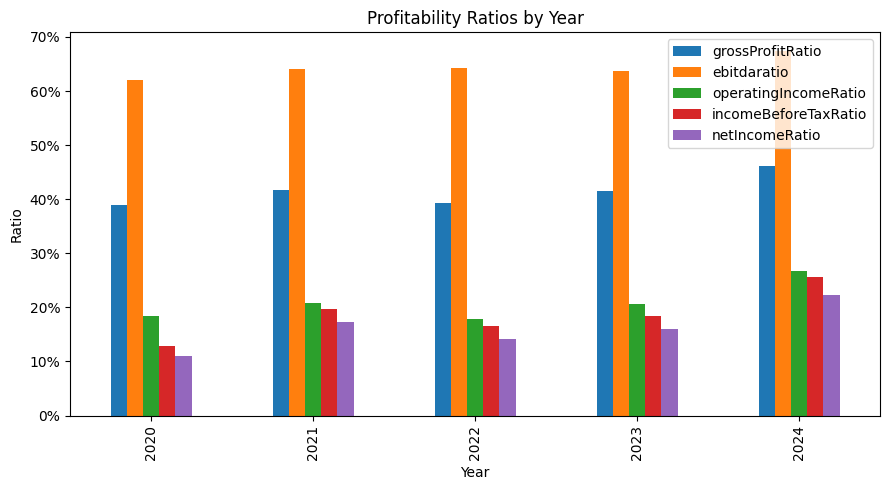

In [18]:
ax = df_ratio_values_year.sort_values("calendarYear").plot(
    x="calendarYear",
    kind="bar",
    figsize=(9,5),
    title="Profitability Ratios by Year"
)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 0.23 → 23%
ax.set_xlabel("Year")
ax.set_ylabel("Ratio")
plt.tight_layout()
plt.show()

In [19]:
ratio_cols = df_ratio_values_year.columns[
    df_ratio_values_year.columns.str.contains("ratio", case=False)
].tolist()

print(ratio_cols)

['grossProfitRatio', 'ebitdaratio', 'operatingIncomeRatio', 'incomeBeforeTaxRatio', 'netIncomeRatio']


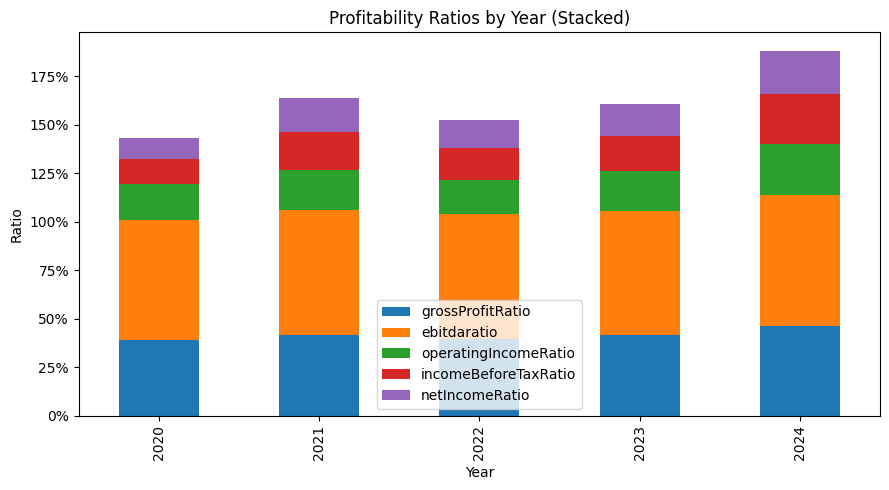

In [20]:
ax = (df_ratio_values_year.sort_values("calendarYear")
        .set_index("calendarYear")[ratio_cols]
        .plot(kind="bar", stacked=True, figsize=(9,5),
              title="Profitability Ratios by Year (Stacked)"))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_xlabel("Year")
ax.set_ylabel("Ratio")
plt.tight_layout()
plt.show()

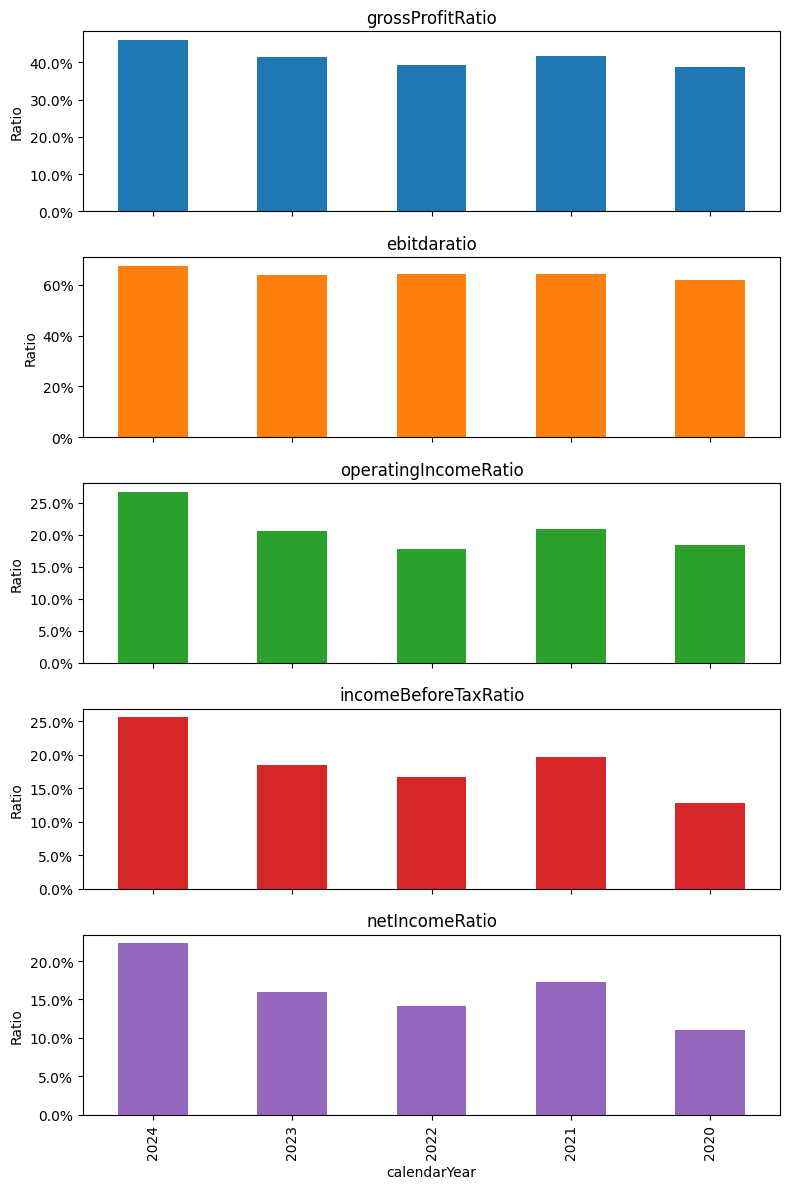

In [21]:
df_ratio_values_year.set_index("calendarYear")[ratio_cols].plot(
    kind="bar",
    subplots=True,
    layout=(len(ratio_cols), 1),  # one column, many rows
    figsize=(8, 12),
    legend=False,
    sharex=True,
    sharey=False,
)

# format each subplot axis
for ax in plt.gcf().axes:
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_ylabel("Ratio")

plt.tight_layout()
plt.show()

In [22]:
x = df_ratio_values_year.set_index("calendarYear")[ratio_cols]

print(x)

              grossProfitRatio  ebitdaratio  operatingIncomeRatio  \
calendarYear                                                        
2024                  0.460566     0.674722              0.267112   
2023                  0.415378     0.637790              0.206208   
2022                  0.393707     0.643131              0.178166   
2021                  0.416366     0.641276              0.208584   
2020                  0.388851     0.620414              0.183440   

              incomeBeforeTaxRatio  netIncomeRatio  
calendarYear                                        
2024                      0.255523        0.223370  
2023                      0.184009        0.160364  
2022                      0.166498        0.142080  
2021                      0.196651        0.172276  
2020                      0.127994        0.110473  


In [23]:
x = x.sort_values('calendarYear',ascending=True)
x

,grossProfitRatio,ebitdaratio,operatingIncomeRatio,incomeBeforeTaxRatio,netIncomeRatio
calendarYear,,,,,
2020,0.388851,0.620414,0.183440,0.127994,0.110473
2021,0.416366,0.641276,0.208584,0.196651,0.172276
2022,0.393707,0.643131,0.178166,0.166498,0.142080
2023,0.415378,0.637790,0.206208,0.184009,0.160364
2024,0.460566,0.674722,0.267112,0.255523,0.223370


array([[<Axes: title={'center': 'grossProfitRatio'}, xlabel='calendarYear'>],
       [<Axes: title={'center': 'ebitdaratio'}, xlabel='calendarYear'>],
       [<Axes: title={'center': 'operatingIncomeRatio'}, xlabel='calendarYear'>],
       [<Axes: title={'center': 'incomeBeforeTaxRatio'}, xlabel='calendarYear'>],
       [<Axes: title={'center': 'netIncomeRatio'}, xlabel='calendarYear'>]],
      dtype=object)

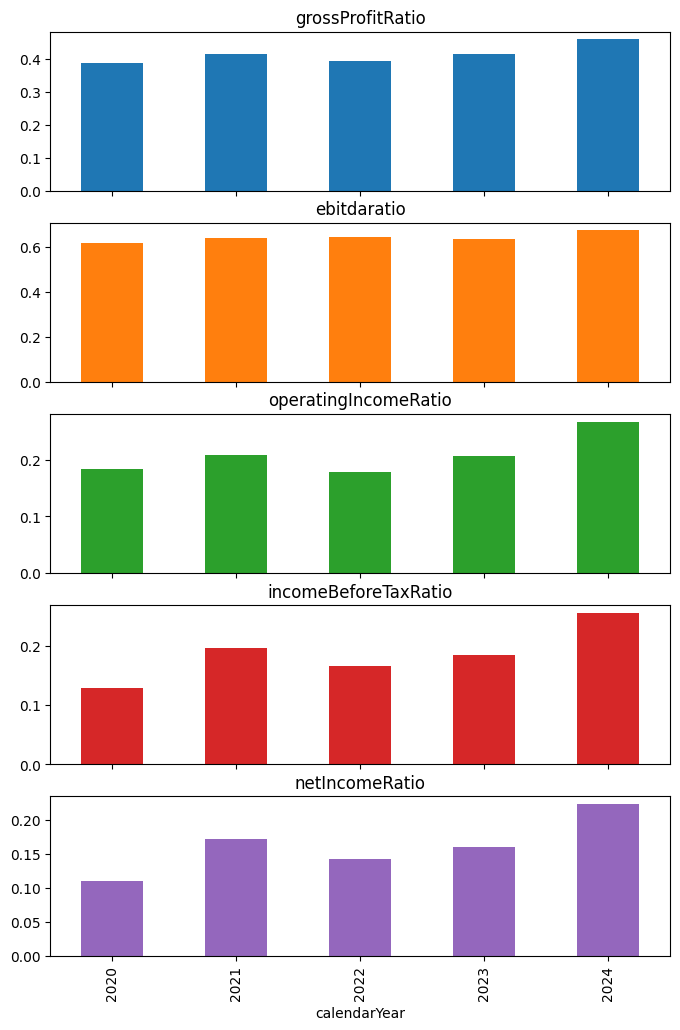

In [24]:
x.plot(
        kind="bar",
    subplots=True,
    layout=(len(ratio_cols), 1),  # one column, many rows
    figsize=(8, 12),
    legend=False,
    sharex=True,
    sharey=False,
)

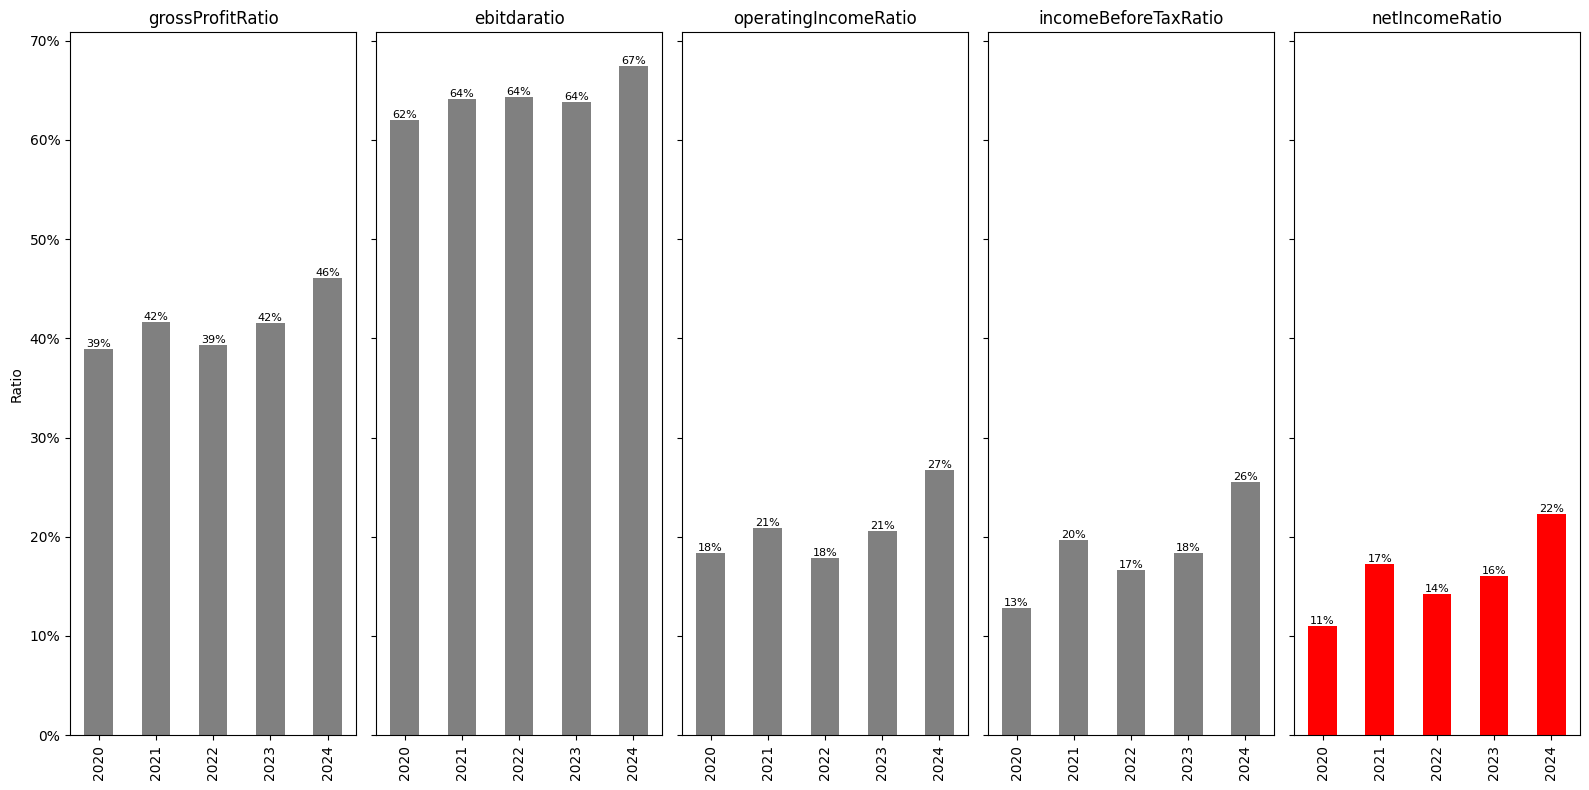

In [26]:
colors = ["red" if int(y) == 2024 else "grey" for y in x.index]

axes = x[ratio_cols].plot(
    kind="bar",
    subplots=True,
    layout= (1,len(ratio_cols)),   # one column of small multiples
    figsize=(16, 8),
    legend=False,
    sharex=True,
    sharey= True,
    color=colors                   # colors map to bars (years) in each facet
)

for ax in axes.flatten():
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_xlabel("")  # cleaner
    ax.set_ylabel("Ratio")
    # optional: value labels
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x()+p.get_width()/2, h, f"{h:.0%}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

In [27]:
colors

['grey', 'grey', 'grey', 'grey', 'red']

In [28]:
df_ratio_values_year

,grossProfitRatio,ebitdaratio,operatingIncomeRatio,incomeBeforeTaxRatio,netIncomeRatio,calendarYear
0,0.460566,0.674722,0.267112,0.255523,0.223370,2024
1,0.415378,0.637790,0.206208,0.184009,0.160364,2023
2,0.393707,0.643131,0.178166,0.166498,0.142080,2022
3,0.416366,0.641276,0.208584,0.196651,0.172276,2021
4,0.388851,0.620414,0.183440,0.127994,0.110473,2020


In [29]:

df_wide = df_ratio_values_year.copy()  


In [30]:
df_wide

,grossProfitRatio,ebitdaratio,operatingIncomeRatio,incomeBeforeTaxRatio,netIncomeRatio,calendarYear
0,0.460566,0.674722,0.267112,0.255523,0.223370,2024
1,0.415378,0.637790,0.206208,0.184009,0.160364,2023
2,0.393707,0.643131,0.178166,0.166498,0.142080,2022
3,0.416366,0.641276,0.208584,0.196651,0.172276,2021
4,0.388851,0.620414,0.183440,0.127994,0.110473,2020


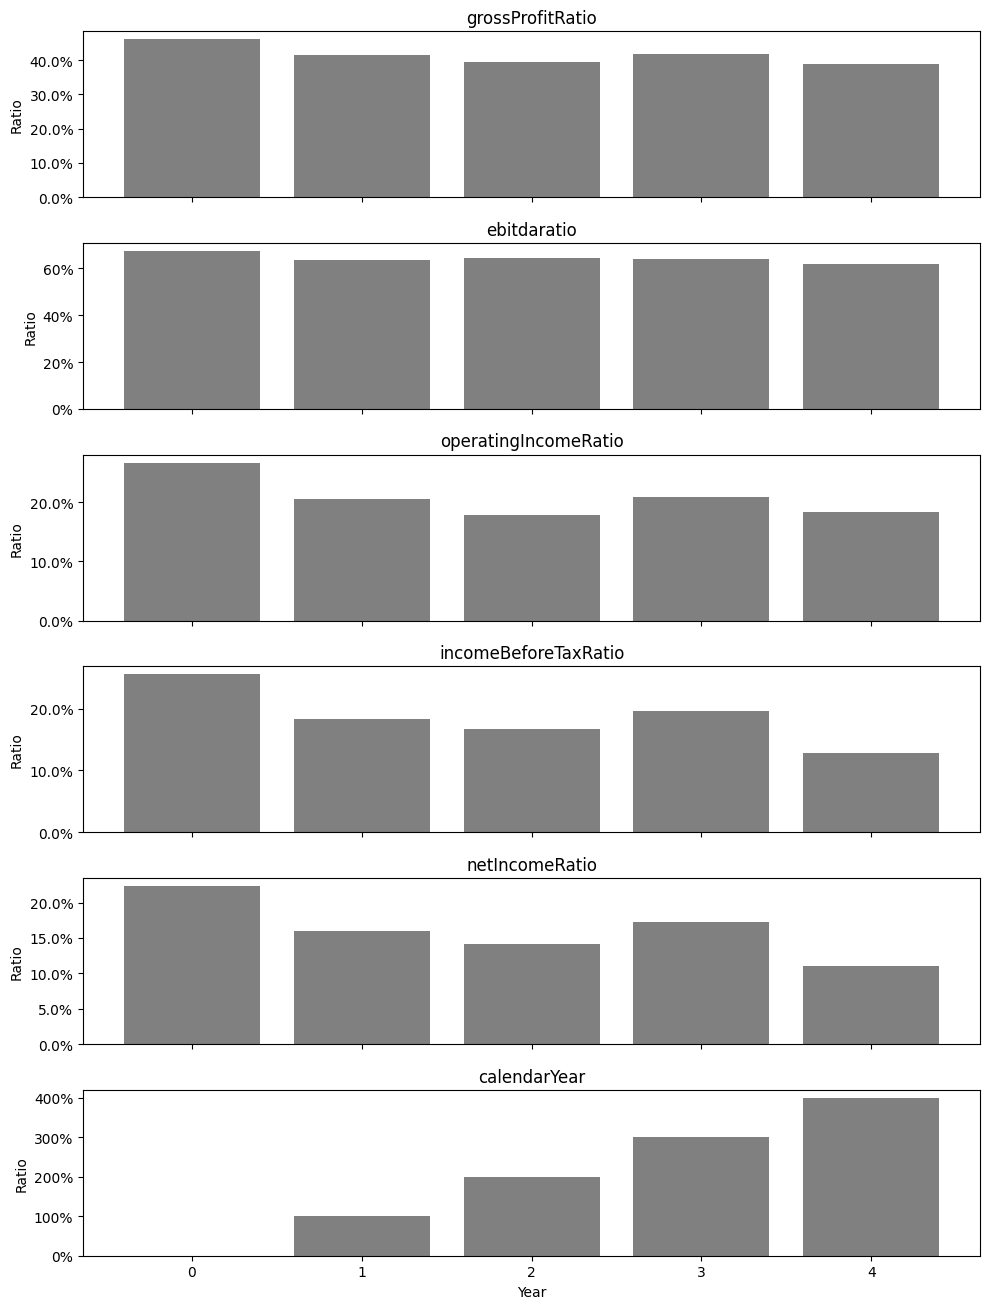

In [31]:
df_wide = df_ratio_values_year.copy()                           # or df_ratio_values_year.copy()
df_wide.index = pd.to_numeric(df_wide.index, errors="coerce").astype("Int64")
df_wide = df_wide.sort_index()

years = df_wide.index.tolist()
bar_colors = ["red" if y == 2024 else "grey" for y in years]

n = len(df_wide.columns)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 2.2*n), sharex=True)
axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]

for ax, col in zip(axes, df_wide.columns):
    vals = df_wide[col].values
    ax.bar(range(len(years)), vals, color=bar_colors)
    ax.set_title(col)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_ylabel("Ratio")
    # value labels
    # for x, v in enumerate(vals):
    #     ax.text(x, v, ha="center", va="bottom", fontsize=8)

axes[-1].set_xticks(range(len(years)))
axes[-1].set_xticklabels([str(y) for y in years])
axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()

In [32]:
df_long = df_ratio_values_year.reset_index().melt(
    id_vars="calendarYear",       # keep year column fixed
    var_name="ratio_type",        # new column for former wide column names
    value_name="ratio_value"      # new column for values
)
print(df_long)

   calendarYear            ratio_type  ratio_value
0          2024                 index     0.000000
1          2023                 index     1.000000
2          2022                 index     2.000000
3          2021                 index     3.000000
4          2020                 index     4.000000
5          2024      grossProfitRatio     0.460566
6          2023      grossProfitRatio     0.415378
7          2022      grossProfitRatio     0.393707
8          2021      grossProfitRatio     0.416366
9          2020      grossProfitRatio     0.388851
10         2024           ebitdaratio     0.674722
11         2023           ebitdaratio     0.637790
12         2022           ebitdaratio     0.643131
13         2021           ebitdaratio     0.641276
14         2020           ebitdaratio     0.620414
15         2024  operatingIncomeRatio     0.267112
16         2023  operatingIncomeRatio     0.206208
17         2022  operatingIncomeRatio     0.178166
18         2021  operatingIncom

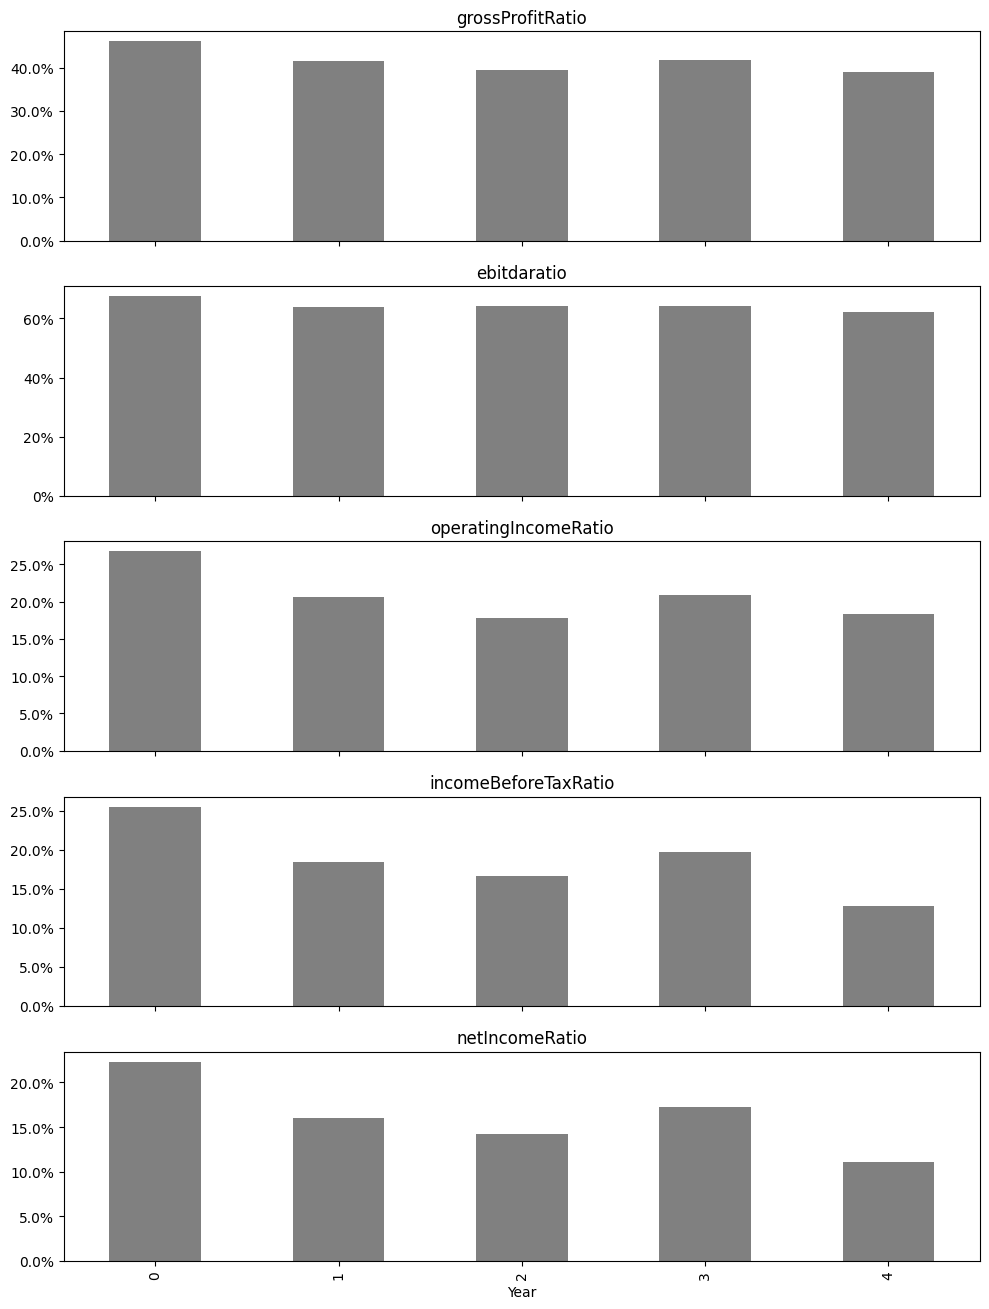

In [34]:
df_wide = df_ratio_values_year.copy()
df_wide.index = pd.to_numeric(df_wide.index, errors="coerce").astype("Int64")
df_wide = df_wide.sort_index()

years = df_wide.index.tolist()
n = df_wide.shape[1]

axes = df_wide.plot(kind="bar", subplots=True, legend=False, sharex=True, figsize=(10, 2.2*n))

# normalize axes into an array
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])

for ax in axes:
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    # one facet = one series → patches length == number of years
    for i, p in enumerate(ax.patches):
        year = years[i % len(years)]
        p.set_facecolor("red" if int(year) == 2024 else "grey")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()

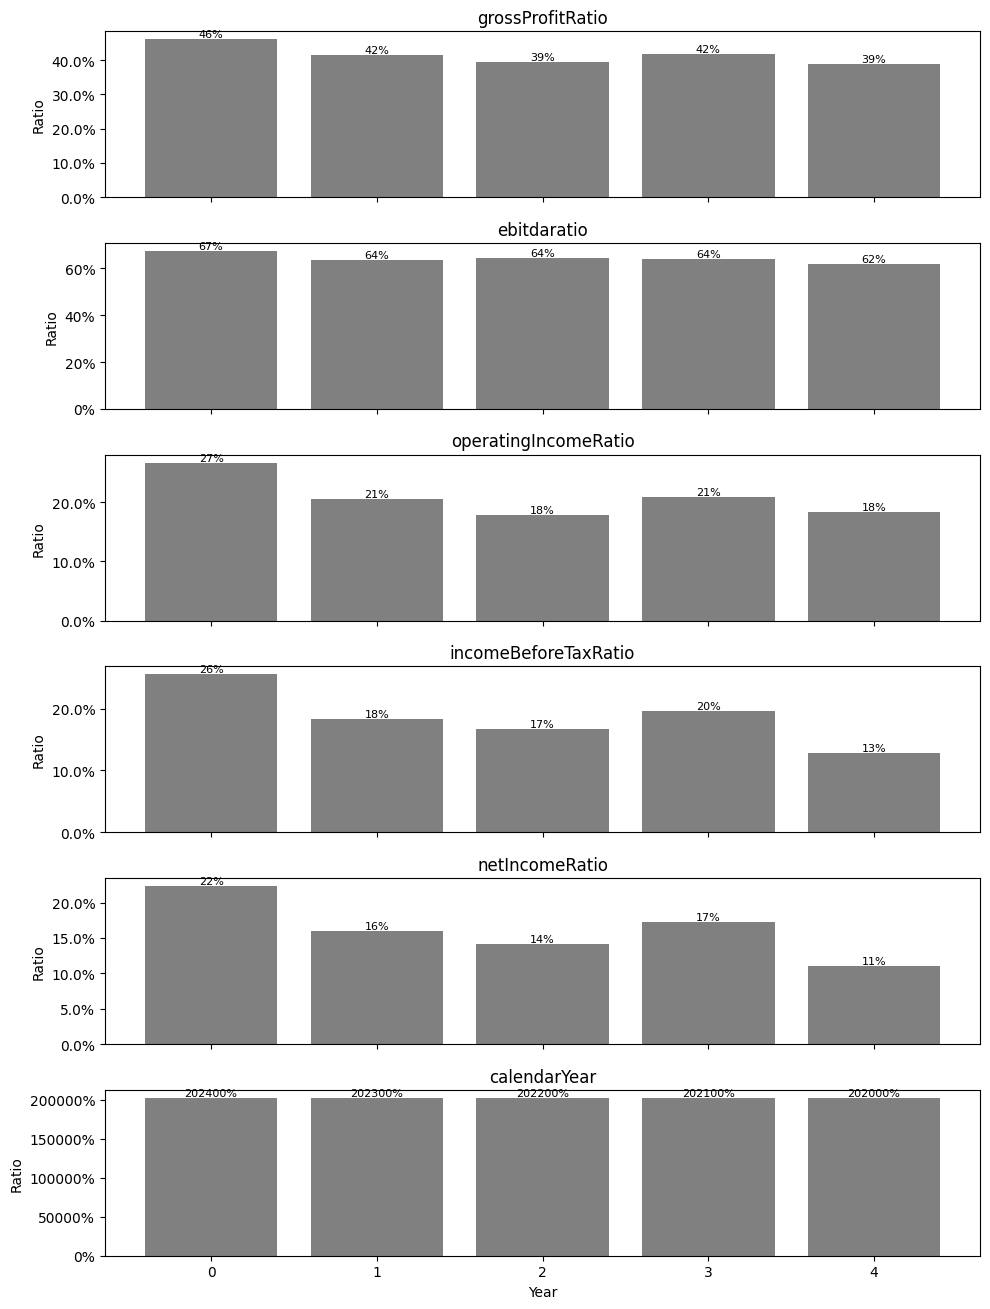

In [35]:
# --- assume df_wide is your wide DF indexed by calendarYear ---
df_wide = df_ratio_values_year.copy()

# ensure year index is numeric & sorted
df_wide.index = pd.to_numeric(df_wide.index, errors="coerce")
df_wide = df_wide.sort_index()

# clean & convert each ratio column to float in [0,1]
def to_ratio(col: pd.Series) -> pd.Series:
    s = col.astype(str).str.replace(',', '', regex=False)   # remove thousands sep
    has_pct = s.str.contains('%', na=False)                 # detect percent strings
    s = s.str.replace('%', '', regex=False)
    vals = pd.to_numeric(s, errors="coerce")
    vals = np.where(has_pct, vals/100.0, vals)              # 42% -> 0.42
    return pd.Series(vals, index=col.index, dtype="float64")

for c in df_wide.columns:
    df_wide[c] = to_ratio(df_wide[c])

# --- plotting with 2024 red, earlier grey (faceted) ---
years = df_wide.index.astype(int).tolist()
colors = ["red" if y == 2024 else "grey" for y in years]

fig, axes = plt.subplots(nrows=df_wide.shape[1], ncols=1, figsize=(10, 2.2*df_wide.shape[1]), sharex=True)
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])

for ax, col in zip(axes, df_wide.columns):
    vals = df_wide[col].to_numpy()
    x = np.arange(len(years))
    ax.bar(x, vals, color=colors)
    ax.set_title(col)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_ylabel("Ratio")
    # safe value labels (now numeric)
    for xi, v in zip(x, vals):
        if np.isfinite(v):
            ax.text(xi, v, f"{v:.0%}", ha="center", va="bottom", fontsize=8)

axes[-1].set_xticks(np.arange(len(years)))
axes[-1].set_xticklabels([str(y) for y in years])
axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()

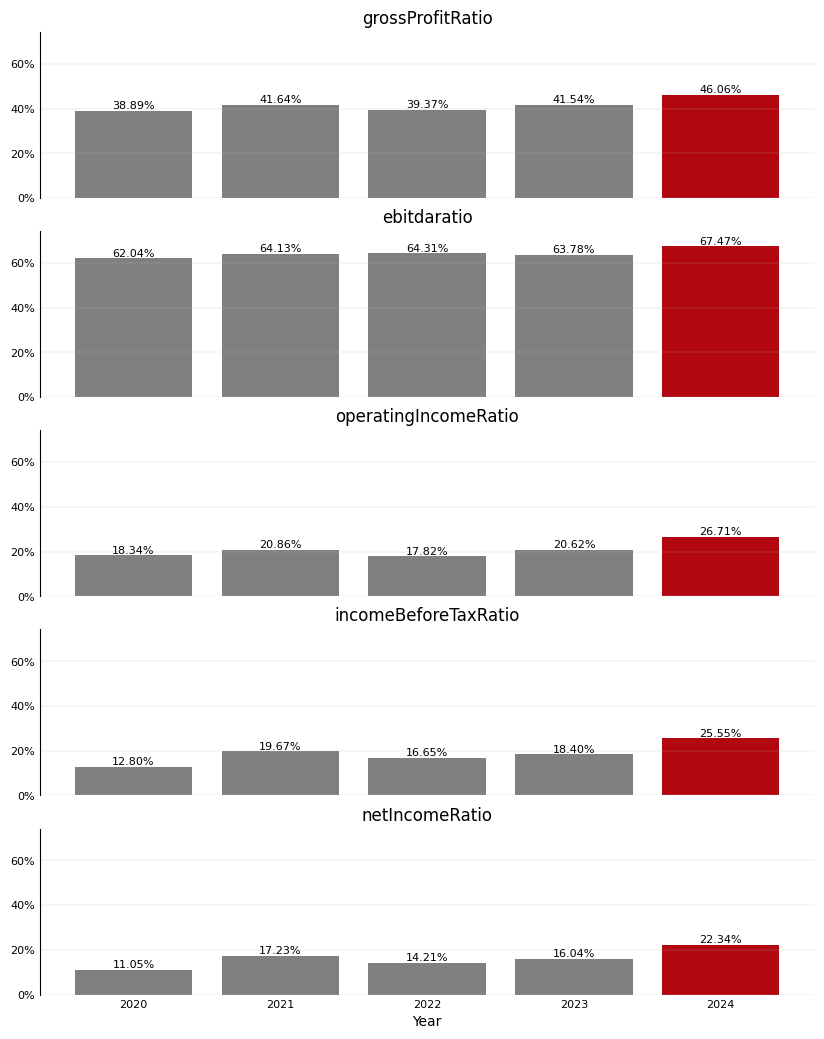

In [41]:
def coerce_ratios_wide(df_like):
    df = df_like.copy()

    # Put year on the index no matter the input shape
    if "calendarYear" in df.columns:
        df = df.set_index("calendarYear")

    # Keep only *ratio* columns
    ratio_cols = [c for c in df.columns if "ratio" in c.lower()]
    df = df[ratio_cols]

    # Year index: numeric, sorted
    df.index = pd.to_numeric(df.index, errors="coerce")
    df = df.loc[df.index.notna()].sort_index()

    # Values → floats in [0, 1]; handle "42%", "0.42", commas, stray text
    for c in df.columns:
        s = df[c].astype(str).str.replace(",", "", regex=False).str.strip()
        pct = s.str.endswith("%")
        s = s.str.rstrip("%")
        vals = pd.to_numeric(s, errors="coerce")
        vals = np.where(pct, vals / 100.0, vals)
        df[c] = vals.astype(float)

    return df

df_wide = coerce_ratios_wide(df_ratio_values_year)   # <-- replace with your DF variable

# ---------- 2) Faceted bars with per-bar colors (2024 red, others grey) ----------
years = df_wide.index.astype(int).tolist()
bar_colors = ["#B20710" if y == 2024 else "grey" for y in years]

n = df_wide.shape[1]

ymax = df_wide.max().max()   # highest value among all ratios
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 2.5*n), sharex=True, constrained_layout=False)
if not isinstance(axes, np.ndarray):  # normalize to list
    axes = np.array([axes])

for ax, col in zip(axes, df_wide.columns):
    vals = df_wide[col].to_numpy()
    x = np.arange(len(years))

    # draw bars with the per-year colors
    ax.bar(x, vals, color=bar_colors, edgecolor="none")


    # aesthetics
    ax.set_title(col)
    ax.yaxis.set_major_formatter(PercentFormatter(2.0))
    ymax = df_wide.max().max()   # highest value among all ratios
    ax.grid(axis="y", lw=0.3, alpha=0.6, zorder=1)
    # ax.set_ylim(0, df_wide[col].max() * 1.1)   # dynamic per column

    for spine in ("top", "right", "bottom"):
        ax.spines[spine].set_visible(False)
    ax.tick_params(length=0, labelsize=8)

    # value labels (%), safe for NaNs
    for xi, v in zip(x, vals):
        if np.isfinite(v):
            ax.text(xi, v, f"{v:.2%}", ha="center", va="bottom", fontsize=8)


for ax in axes:
    ax.set_ylim(0, ymax * 1.1)   # add 10% headroom
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
 
# shared x labels as years
axes[-1].set_xticks(np.arange(len(years)))
axes[-1].set_xticklabels([str(y) for y in years])
axes[-1].set_xlabel("Year")

plt.show()

In [37]:
axes

array([<Axes: title={'center': 'grossProfitRatio'}>,
       <Axes: title={'center': 'ebitdaratio'}>,
       <Axes: title={'center': 'operatingIncomeRatio'}>,
       <Axes: title={'center': 'incomeBeforeTaxRatio'}>,
       <Axes: title={'center': 'netIncomeRatio'}, xlabel='Year'>],
      dtype=object)

In [38]:
years

[2020, 2021, 2022, 2023, 2024]

In [45]:
df_wide2 = df_wide.drop(columns=['ebitdaratio'])

In [ ]:
df_wide2 

,grossProfitRatio,operatingIncomeRatio,incomeBeforeTaxRatio,netIncomeRatio
calendarYear,,,,
2020,0.388851,0.183440,0.127994,0.110473
2021,0.416366,0.208584,0.196651,0.172276
2022,0.393707,0.178166,0.166498,0.142080
2023,0.415378,0.206208,0.184009,0.160364
2024,0.460566,0.267112,0.255523,0.223370


In [166]:
df_wide2 = df_wide2.rename(columns={
    "grossProfitRatio": "Gross Profit Margin",
    "ebitdaratio": "EBITDA Margin",
    "operatingIncomeRatio": "Operating Margin",
    "incomeBeforeTaxRatio": "Pre-Tax Margin",
    "netIncomeRatio": "Net Income Margin"
})

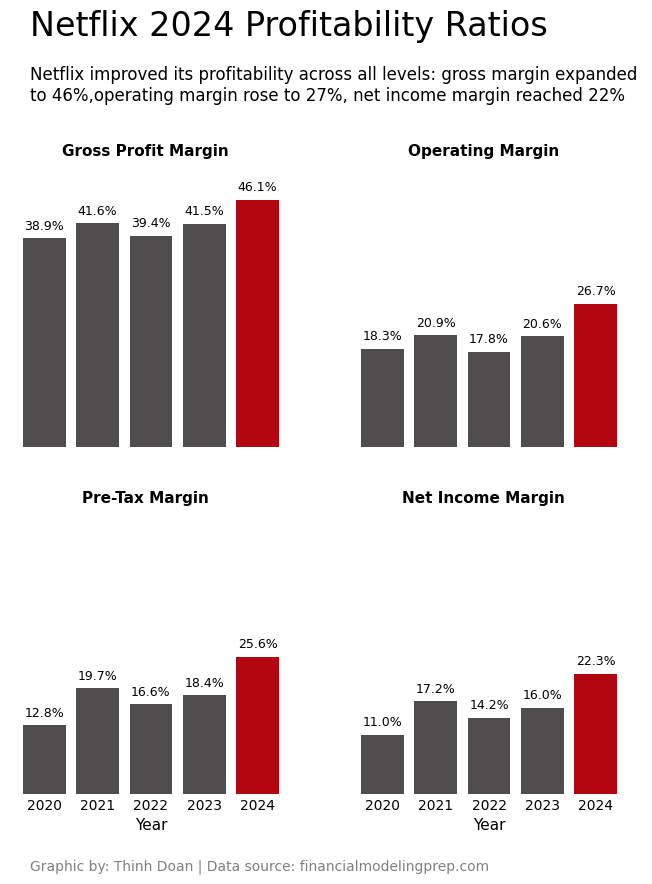

In [167]:
years = df_wide2.index.astype(int).tolist()
bar_colors = ["#B20710" if y == 2024 else "#4f4d4d" for y in years]

# common y-limit (add headroom)
ymax = float(df_wide2.max().max())
ylim = (0.0, ymax * 1.12)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4*2),
                         sharex=True, sharey=True, constrained_layout=False)

axes = np.array(axes).ravel()                 # always flatten to 1D
cols = df_wide2.columns.tolist()
nplots = min(len(cols), len(axes))

for ax, col in zip(axes[:nplots], cols):
    vals = df_wide2[col].to_numpy(float)
    x = np.arange(len(years))

    ax.bar(x, vals, color=bar_colors, edgecolor="none", zorder=5)
    ax.set_ylim(*ylim)

    # title & minimal look
    ax.set_title(col, loc="center", x=0.48, y=1.02, fontsize=11, fontweight="bold")
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis="x", length=0) 
    for spine in ("top", "right", "bottom"):
        ax.spines[spine].set_visible(False)

    # value labels (%), safe for NaNs
    for xi, v in zip(x, vals):
        if np.isfinite(v):
            ax.text(xi, v + (ylim[1]*0.02), f"{v:.1%}",
                    ha="center", va="bottom", fontsize=9, clip_on=False)

# x ticks on bottom row
bottom_row = axes[-2:]                         # last two axes in a 2x2
for ax in bottom_row:
    ax.set_xticks(np.arange(len(years)))
    ax.set_xticklabels([str(y) for y in years])
    ax.set_xlabel("Year", fontsize = 11)
    ax.tick_params(axis="x", length=0) 

# hide any unused panels
for ax in axes[nplots:]:
    ax.set_visible(False)

# leave space for caption
plt.subplots_adjust(bottom=0.12, top=0.9, hspace=0.25)


# title 
fig.text(
    x = 0.15, 
    y = 1.1,
    s = "Netflix 2024 Profitability Ratios",
    ha="left", 
    va="top", 
    fontsize=24, 
    color="black", 
    # style="oblique"
)

# sub-title 
fig.text(
    x = 0.15, 
    y = 1.03,
    s = "Netflix improved its profitability across all levels: gross margin expanded \nto 46%,operating margin rose to 27%, net income margin reached 22%",
    ha="left", 
    va="top", 
    fontsize=12, 
    color="black", 
    # style="oblique"
)

# caption/footer
fig.text(
    x = 0.15, 
    y = 0.02,
    s = "Graphic by: Thinh Doan | Data source: financialmodelingprep.com",
    ha="left", va="bottom", fontsize=10, color="grey"
)

plt.show()
